<a href="https://colab.research.google.com/github/royn5618/EP_23_Intro_to_ML_Workshop/blob/main/Notebooks/Linear_Regression_California_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [15]:
from sklearn.datasets import fetch_california_housing

df = fetch_california_housing(as_frame=True, return_X_y=False)['frame']

# Explore Data

## Basic Data Info

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Observations**
- the dataset contains 20,640 samples and 8 features

- all features are numerical features encoded as floating number

- there are no missing values*

*But there could be data anomalies.

## Scan Few Data Points

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Univariate Analysis

Analyzing the range, value concentration and outliers for each variable.

In [19]:
geog_columns =  ['longitud', 'latitude']
numeric_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                   'Population',	'AveOccup']

target_column = 'MedHouseVal'

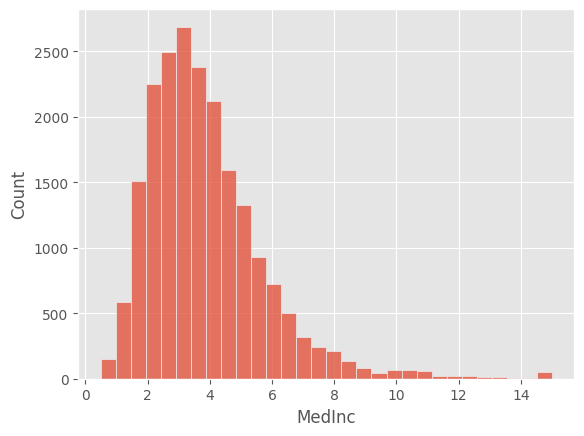

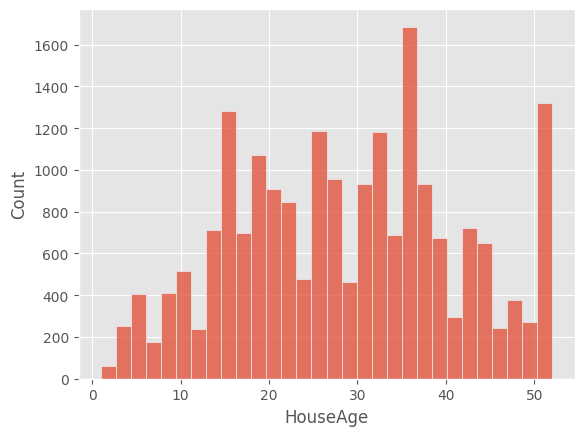

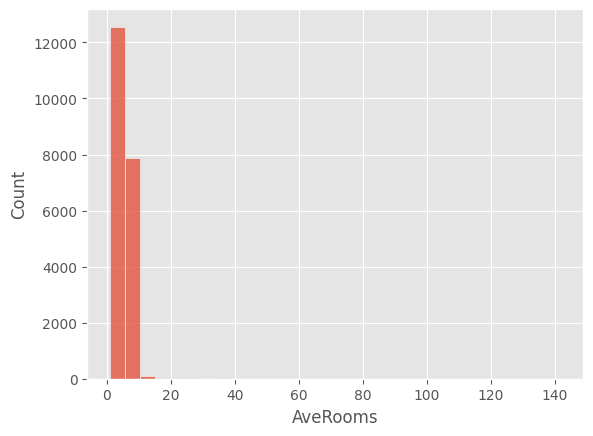

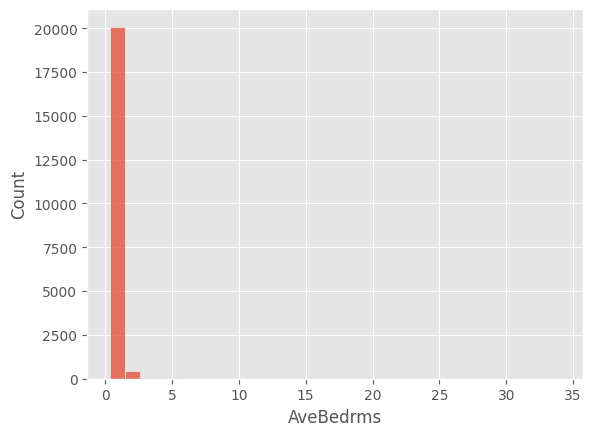

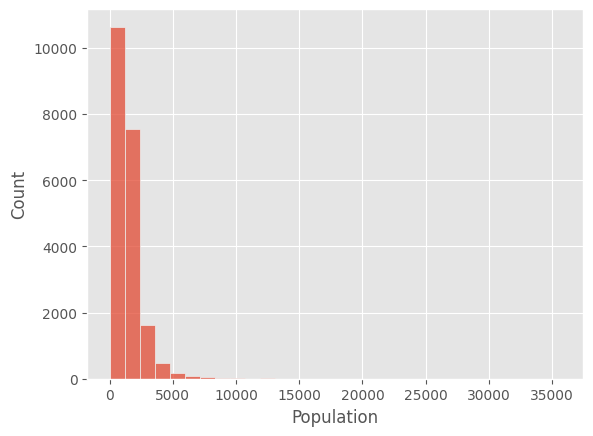

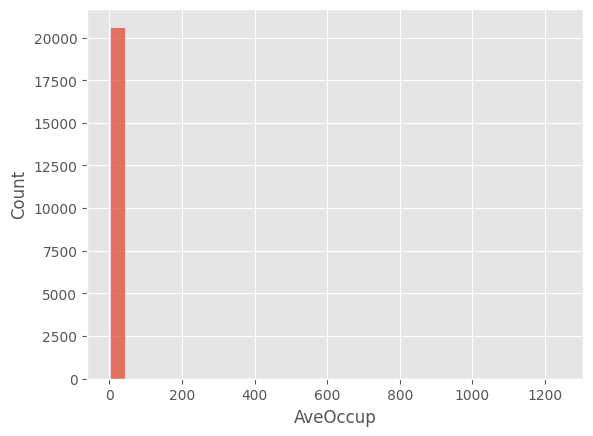

In [20]:
for each_col in numeric_columns:
  sns.histplot(df[each_col], bins=30)
  plt.show()

**Observations**

- The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

- Regarding the average house age, the distribution is more or less uniform

- 'AveRooms', 'AveBedrms','Population',	'AveOccup' have extreme values i.e. they potentially has outliers.

# Target Analysis

Here, instead of using histogram, we are using a box plot.

<Axes: xlabel='MedHouseVal'>

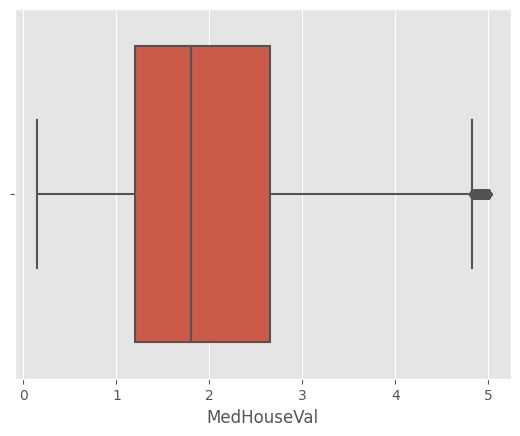

In [21]:
sns.boxplot(x=df[target_column])

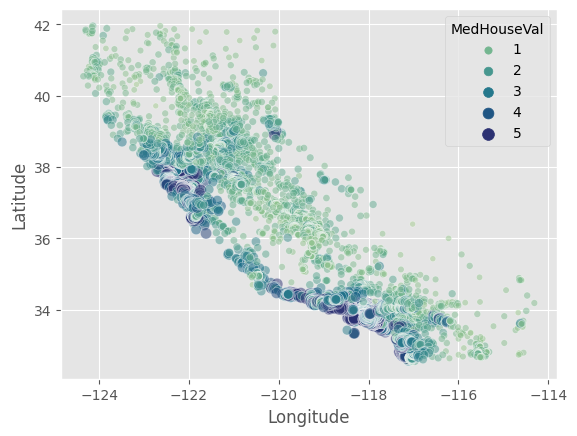

In [22]:
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size=target_column,
    hue=target_column,
    palette='crest',
    alpha=0.5,
)

plt.show()

**Observations:**

- The high-valued houses are mostly located on the coastline, around the big cities of San Diego, Los Angeles, San Jose, or San Francisco.

# Bivariate Correlation Analysis

In this section, only two columns - AveBedrms and AveRooms are selected to demonstrate fitting of a linear regression line.

In [23]:
lin_reg_cols= ['AveBedrms', 'AveRooms']

We will use a scatteplot here to analyse the nature of their correlation.

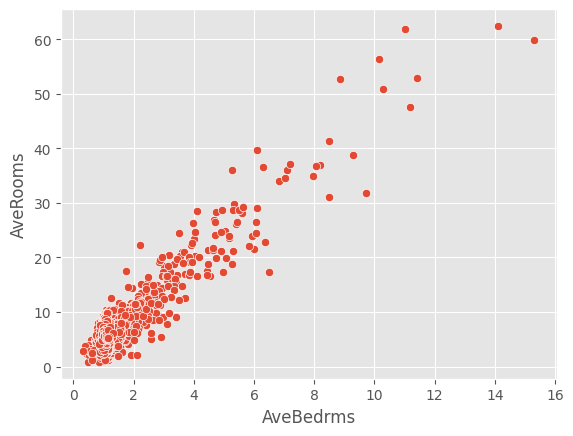

In [24]:
df_lin_reg = df[df[lin_reg_cols[0]] < 20][lin_reg_cols]
sns.scatterplot(df_lin_reg, # selecting AveRooms upto 20 for a closer look
                x=lin_reg_cols[0],
                y=lin_reg_cols[1]
                )

plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [36]:
reg = LinearRegression()
reg.fit(np.array(df_lin_reg['AveBedrms']).reshape(-1, 1), df_lin_reg['AveRooms'])

LinearRegression()

In [37]:
reg.coef_

array([4.40327235])

In [38]:
reg.intercept_

0.5995387028227697

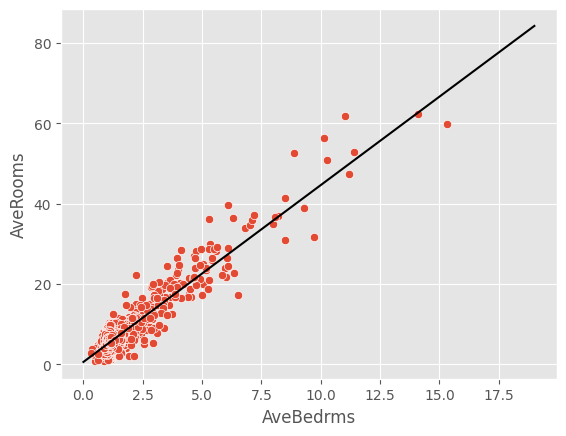

In [39]:
sns.scatterplot(df_lin_reg, # selecting AveRooms upto 20 for a closer look
                x=lin_reg_cols[0],
                y=lin_reg_cols[1]
                )
y_plot = []
for i in range(20):
    y_plot.append((reg.coef_ * i) + reg.intercept_)
plt.plot(range(len(y_plot)),y_plot,color='black',label = 'pred')
plt.show()

In [40]:
reg.predict(np.array(2).reshape(1, -1))

array([9.4060834])

# Fitting Linear Regression on Multiple Features

Tip:

1. Use Scikit-Learn Pipeline
2. Use Standard Scalar to Scale the Numeric Values between 0 and 1.

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [44]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [48]:
# Drop Lat and Long
df_train = df[numeric_columns]
df_target = df[target_column]

In [49]:
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_for_model,
                                                     df_target,
                                                    test_size=0.2,
                                                    random_state=42)

In [51]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000


In [50]:
y_train.head()

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64

In [56]:
# Train and predict using linear regression
lin_reg = LinearRegression()
# Train with the train dataset
lin_reg.fit(X_train, y_train)

LinearRegression()

In [58]:
coeff_df = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MedInc,0.546161
HouseAge,0.016788
AveRooms,-0.223920
AveBedrms,1.115493
Population,0.000023
AveOccup,-0.004618


In [59]:

intercept_df = pd.Series(lin_reg.intercept_)
intercept_df

0   -0.552873
dtype: float64

In [60]:
# Make prediction
y_pred = lin_reg.predict(X_test)

In [61]:
y_pred

array([1.00100537, 1.56005635, 2.67713262, ..., 4.36752832, 1.50136763,
       1.95368721])

# Evaluating Linear Regression Models

- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error   

Link: https://scikit-learn.org/stable/modules/model_evaluation.html

In [62]:
from sklearn import metrics

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.579214066545444
Mean Squared Error: 0.642187231453487
Root Mean Squared Error: 0.8013658536857475


In [65]:
df_eval = pd.DataFrame()
df_eval['actual'] = y_test
df_eval['predictions'] = y_pred
df_eval

,actual,predictions
20046,0.47700,1.001005
3024,0.45800,1.560056
15663,5.00001,2.677133
20484,2.18600,2.647633
9814,2.78000,1.982300
...,...,...
15362,2.63300,1.869894
16623,2.66800,1.462591
18086,5.00001,4.367528
2144,0.72300,1.501368
